In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

## EDA

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [5]:
customers.describe(include='all')

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2022-04-16
freq,1,1,59,3


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [11]:
products.describe(include='all')

,ProductID,ProductName,Category,Price
count,100,100,100,100.000000
unique,100,66,4,NaN
top,P001,ActiveWear Smartwatch,Books,NaN
freq,1,4,26,NaN
mean,NaN,NaN,NaN,267.551700
std,NaN,NaN,NaN,143.219383
min,NaN,NaN,NaN,16.080000
25%,NaN,NaN,NaN,147.767500
50%,NaN,NaN,NaN,292.875000
75%,NaN,NaN,NaN,397.090000


In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [12]:
transactions.describe(include='all')

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000
unique,1000,199,100,1000,NaN,NaN,NaN
top,T00992,C0109,P059,2024-04-21 10:52:24,NaN,NaN,NaN
freq,1,11,19,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.537000,689.995560,272.55407
std,NaN,NaN,NaN,NaN,1.117981,493.144478,140.73639
min,NaN,NaN,NaN,NaN,1.000000,16.080000,16.08000
25%,NaN,NaN,NaN,NaN,2.000000,295.295000,147.95000
50%,NaN,NaN,NaN,NaN,3.000000,588.880000,299.93000
75%,NaN,NaN,NaN,NaN,4.000000,1011.660000,404.40000


C:\Users\Gaurav Arora\AppData\Local\Temp\ipykernel_18464\2377140403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


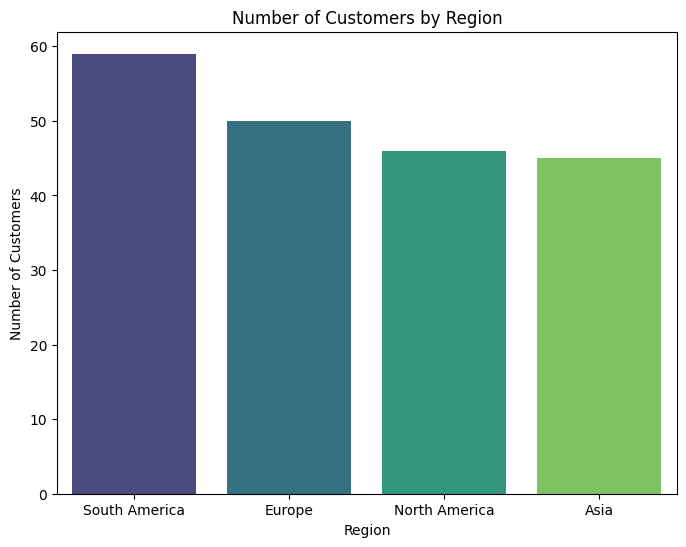

In [16]:
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title("Number of Customers by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

C:\Users\Gaurav Arora\AppData\Local\Temp\ipykernel_18464\2535187488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


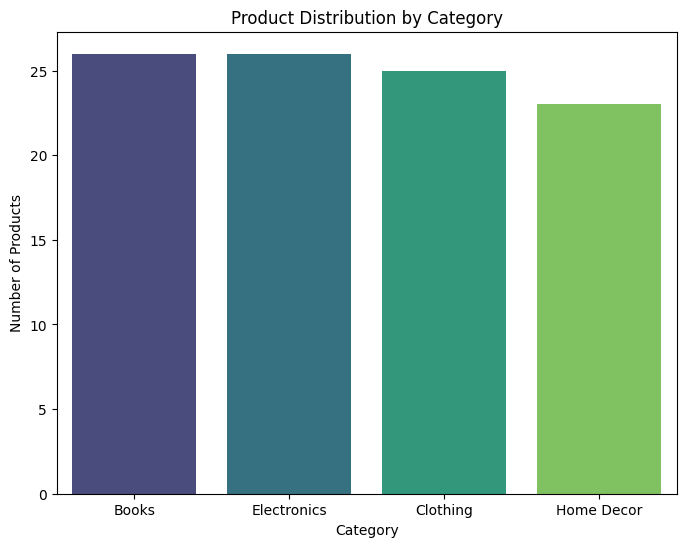

In [17]:
category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

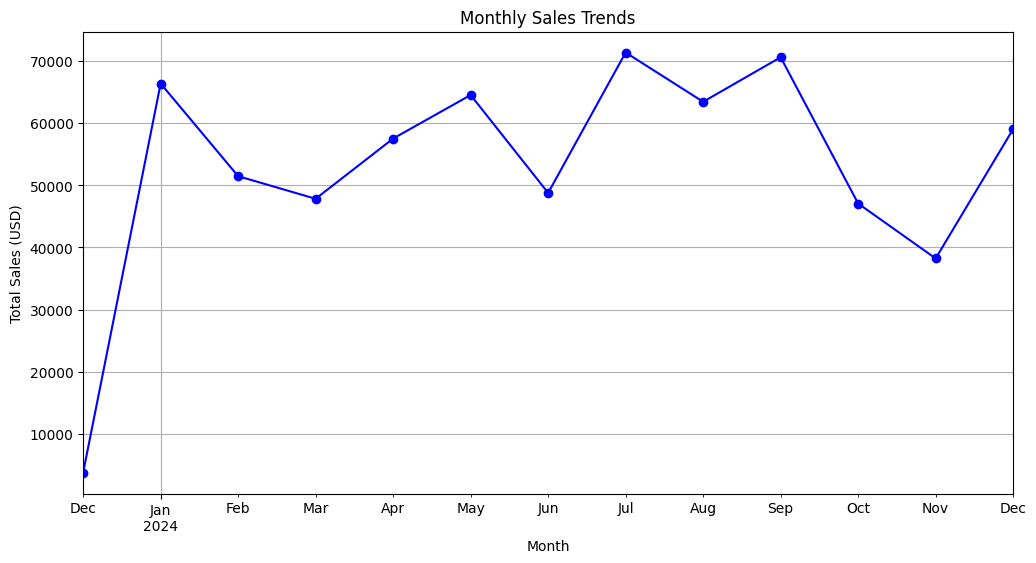

In [18]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid()
plt.show()

C:\Users\Gaurav Arora\AppData\Local\Temp\ipykernel_18464\3391500048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product_details['ProductName'], y=top_products.values, palette='coolwarm')


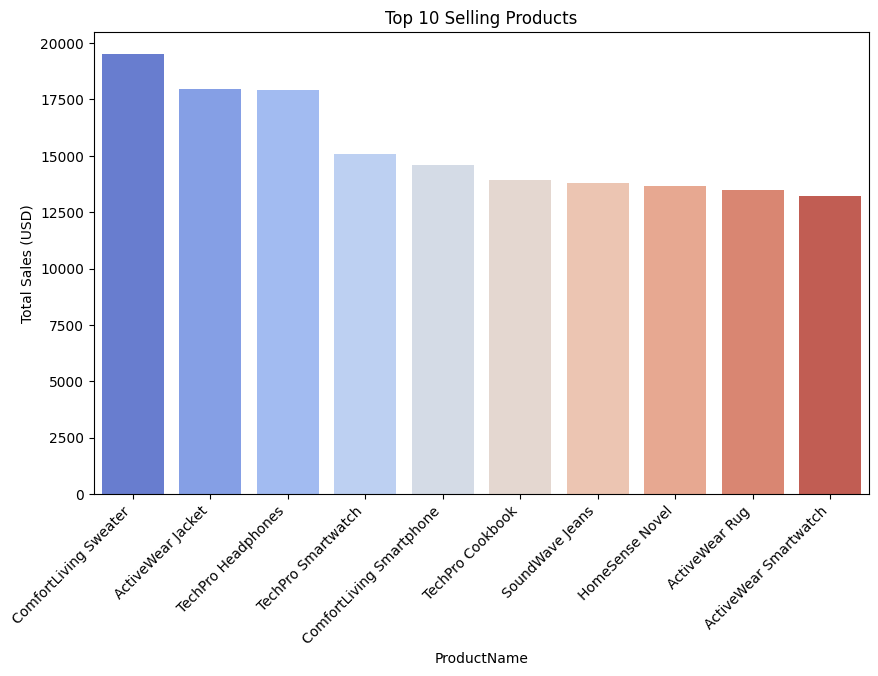

In [19]:
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_product_details = products[products['ProductID'].isin(top_products.index)]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_product_details['ProductName'], y=top_products.values, palette='coolwarm')
plt.title("Top 10 Selling Products")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Sales (USD)")
plt.show()

In [79]:
top_product_details['ProductName']

18       ComfortLiving Sweater
19           ActiveWear Jacket
28          TechPro Headphones
38          TechPro Smartwatch
40    ComfortLiving Smartphone
47            TechPro Cookbook
58             SoundWave Jeans
61             HomeSense Novel
78              ActiveWear Rug
82       ActiveWear Smartwatch
Name: ProductName, dtype: object

In [20]:
customer_transaction_counts = transactions['CustomerID'].value_counts()
single_transaction_customers = customer_transaction_counts[customer_transaction_counts == 1].count()
total_customers = customers['CustomerID'].nunique()
print(f"Customers with only one transaction: {single_transaction_customers} ({(single_transaction_customers / total_customers) * 100:.2f}% of total customers)")

Customers with only one transaction: 12 (6.00% of total customers)


In [21]:
repeat_customers = customer_transaction_counts[customer_transaction_counts > 1].index
repeat_customer_revenue = transactions[transactions['CustomerID'].isin(repeat_customers)]['TotalValue'].sum()
total_revenue = transactions['TotalValue'].sum()
print(f"Revenue from repeat customers: ${repeat_customer_revenue:.2f} ({(repeat_customer_revenue / total_revenue) * 100:.2f}% of total revenue)")

Revenue from repeat customers: $683654.59 (99.08% of total revenue)


In [28]:
customer_transaction_counts = transactions['CustomerID'].value_counts()
top_repeating_customers = customer_transaction_counts.head(5)
print("Top 5 Repeating Customers:")
print(top_repeating_customers)

Top 5 Repeating Customers:
CustomerID
C0109    11
C0156    11
C0008    10
C0141    10
C0175    10
Name: count, dtype: int64


In [29]:
top_customers_details = customers[customers['CustomerID'].isin(top_repeating_customers.index)]
top_customers_details['TransactionCount'] = top_customers_details['CustomerID'].map(top_repeating_customers)
print("\nDetails of Top 5 Repeating Customers:")
print(top_customers_details)


Details of Top 5 Repeating Customers:
    CustomerID     CustomerName         Region  SignupDate  TransactionCount
7        C0008         David Li  North America  2024-01-13                10
108      C0109    Abigail Jones  North America  2022-05-09                11
140      C0141     Paul Parsons         Europe  2023-02-23                10
155      C0156    William Adams  North America  2023-08-19                11
174      C0175  Matthew Johnson           Asia  2022-04-16                10


C:\Users\Gaurav Arora\AppData\Local\Temp\ipykernel_18464\1252360446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_customers_details['TransactionCount'] = top_customers_details['CustomerID'].map(top_repeating_customers)


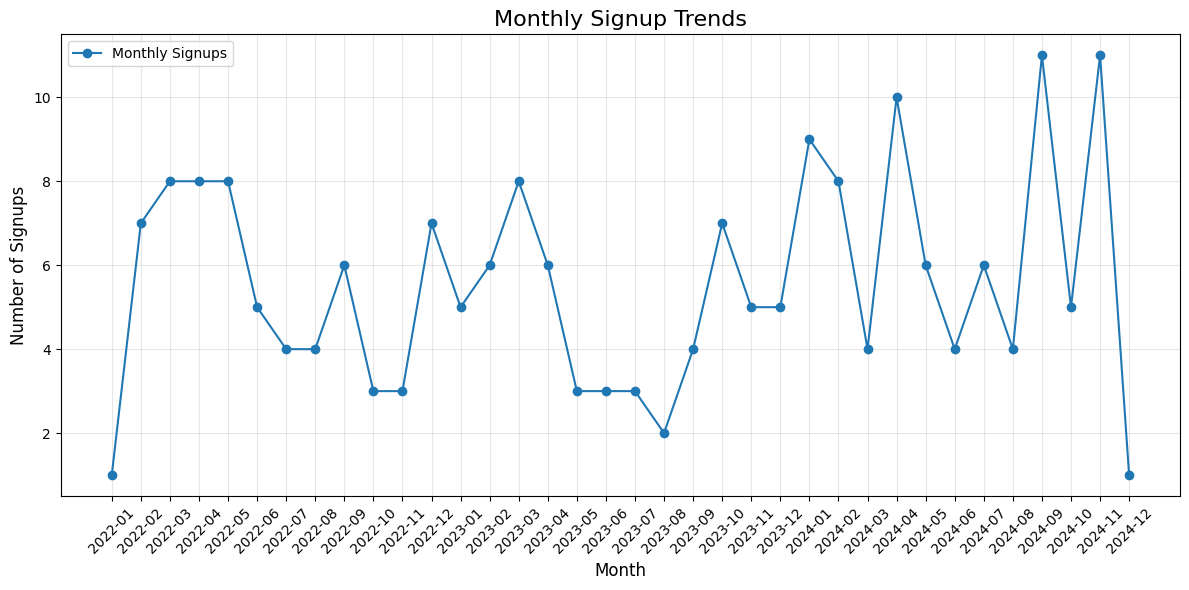

In [30]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')  # Year-Month format
monthly_signups = customers['SignupMonth'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_signups.index.astype(str), monthly_signups.values, marker='o', label='Monthly Signups')
plt.title('Monthly Signup Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

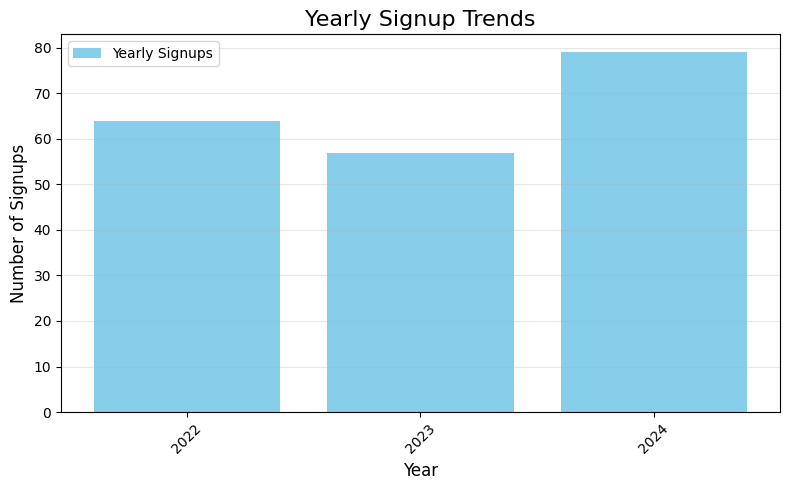

In [31]:
yearly_signups = customers['SignupYear'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.bar(yearly_signups.index.astype(str), yearly_signups.values, color='skyblue', label='Yearly Signups')
plt.title('Yearly Signup Trends', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()